In [13]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [14]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [15]:
df.shape

(200, 2)

In [16]:
df.info

<bound method DataFrame.info of         TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]>

In [17]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


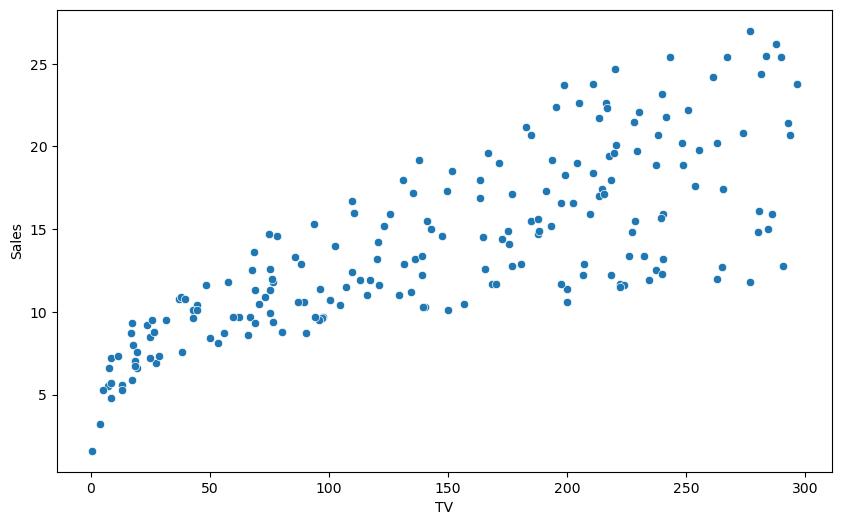

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["TV"],y=df["Sales"])
plt.show()

In [19]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [20]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [21]:
df['Sales']=pd.to_numeric(df['Sales']).astype(int)

In [22]:
df['TV']=pd.to_numeric(df['TV']).astype(int)

In [23]:
X=df['TV']
y=df['Sales']

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


In [27]:
X_mean=sum(X_train)/len(X_train)
y_mean=sum(y_train)/len(y_train)

In [16]:
num=sum((X.iloc[i]-X_mean)*(y.iloc[i]-y_mean)
        for i in range(len(X_train)))
den=sum((X.iloc[i]-X_mean)**2 
        for i in range(len(X_train)))
m=num/den

In [17]:
m

0.04832093810146603

In [27]:
b=y_mean-(m*X_mean)
b

6.5028251852536

In [28]:
def predict(x):
    return (m*x)+b
predictions=predict(X_test)
predictions

95     14.379138
15     15.925408
30     20.612539
158     7.034356
128    17.133432
115    10.126896
69     16.940148
170     8.918872
174    17.230073
45     14.958989
66      8.000774
182     9.208798
165    17.809925
78      6.744430
186    13.219436
177    14.717385
56      6.841072
152    16.022050
82     10.126896
68     17.954888
124    17.568320
16      9.740328
148     8.339021
93     18.583060
65      9.836970
60      9.063835
84     16.795185
67     13.219436
125    10.706747
132     6.889393
9      16.118692
18      9.836970
55     16.070371
75      7.275960
150    20.032688
104    18.003208
135     8.822230
137    19.694441
164    12.156375
76      7.807491
79     12.108054
197    15.055631
38      8.580626
24      9.498723
122    17.326715
195     8.339021
29      9.885291
19     13.606003
143    11.528203
86     10.175216
114    10.271858
173    14.620743
5       6.889393
126     6.841072
117    10.175216
73     12.736226
140    10.030254
98     20.467576
172     7.4209

In [32]:
import numpy as np
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)
y_pred

array([14.36694701, 15.85832649, 20.37907055,  7.28289446, 17.02346671,
       10.26565343, 16.83704427,  9.10051321, 17.11667793, 14.92621431,
        8.21500664,  9.38014686, 17.67594523,  7.00326081, 13.24841239,
       14.69318627,  7.09647203, 15.95153771, 10.26565343, 17.81576206,
       17.44291719,  9.89280856,  8.5412459 , 18.42163498,  9.98601977,
        9.24033003, 16.69722745, 13.24841239, 10.82492073,  7.14307763,
       16.04474892,  9.98601977, 15.99814332,  7.51592251, 19.81980324,
       17.86236767,  9.00730199, 19.49356398, 12.223089  ,  8.0285842 ,
       12.17648339, 15.01942553,  8.77427394,  9.65978051, 17.20988915,
        8.5412459 , 10.03262538, 13.62125726, 11.61721608, 10.31225904,
       10.40547025, 14.59997505,  7.14307763,  7.09647203, 10.31225904,
       12.7823563 , 10.17244221, 20.23925372,  7.65573933, 15.95153771])

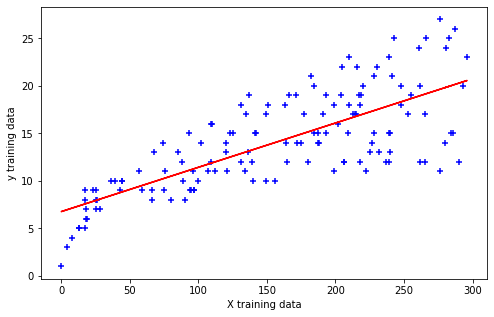

In [41]:
plt.figure(figsize=(8,5))
y_pred=model.predict(X_train)
plt.scatter(X_train,y_train,color="blue",marker="+")
plt.plot(X_train,y_pred,color="red")
plt.xlabel("X training data")
plt.ylabel("y training data")
plt.show()

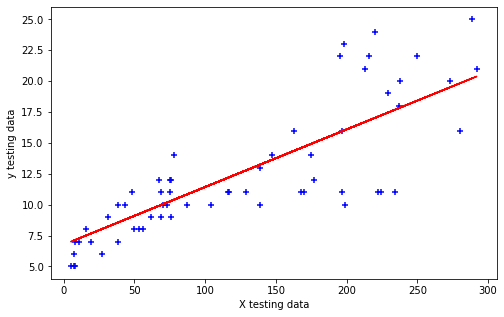

In [42]:
plt.figure(figsize=(8,5))
y_pred=model.predict(X_test)
plt.scatter(X_test,y_test,color="blue",marker="+")
plt.plot(X_test,y_pred,color="red")
plt.xlabel("X testing data")
plt.ylabel("y testing data")
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

9.025815773854363
0.6665715407140438
